In [1]:
# define and move to dataset directory
datasetdir = 'train'
import os
os.chdir(datasetdir)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# import the needed packages

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)







2022-12-02 20:19:07.166579: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:

# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [3]:
gen = ImageDataGenerator()


In [4]:


iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('Deinopis_Spider','Red_Knee_Tarantula', 'Peacock_Spider'),
    color_mode = 'rgb'
)
# # print(np.shape(iterator))
# print(len(iterator))
# type(iterator[0]) #iterator ma ilosc bachy

print(np.shape(iterator[0][0][0])) #pierwszy obrazek z pierwszego batcha 
# # |pierwsze zero to ktory batch | drugie to tupel |  trzcie to wyciagniecie z batcha pierwszego obrazka
# plt.imshow(iterator[0][0][0])






Found 404 images belonging to 3 classes.
(256, 256, 3)


In [5]:
batch = iterator.next()
# len(batch)


In [6]:

# def plot_images(batch):
#     imgs = batch[0]
#     labels = batch[1]
#     ncols, nrows = 4,8
#     fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
#     for i, (img,label) in enumerate(zip(imgs,labels)):
#       plt.subplot(nrows, ncols, i+1)
#       plt.imshow(img.astype(np.int))
#       assert(label[0]+label[1]==1.)
#       categ = 'dein' if label[0]>0.5 else 'red'
#       print(label[0], " l1: ", label[1])
#       plt.title( '{} {}'.format(str(label), categ))
#       plt.axis('off')

# plot_images(batch)

In [7]:
# from sklearn.preprocessing import MultiLabelBinarizer as mlb

# labels = {0: 'gladiator', 1:'red', 2 : 'pea'}
# mlb =  MultiLabelBinarizer()
# mlb.fit(labels)

imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2
)

In [8]:
batch_size = 32
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('Deinopis_Spider','Red_Knee_Tarantula','Peacock_Spider'),
    batch_size = batch_size,
    subset = 'training',
    shuffle = True,
    class_mode="sparse",
    color_mode="rgb"
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('Deinopis_Spider','Red_Knee_Tarantula','Peacock_Spider'),
    batch_size = batch_size,
    subset = 'validation',
    shuffle = True,
    class_mode="sparse",
    color_mode="rgb"
)

Found 324 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


In [9]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    3, activation='softmax',
    )
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten (Flatten)           (None, 311904)            0

In [10]:
model.compile(optimizer = "adam",loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [11]:
history = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=10,
    batch_size = batch_size
)

Epoch 1/10
11/11 [==============================] - 19s 2s/step - loss: 1.5152 - acc: 0.3580 - val_loss: 1.0321 - val_acc: 0.4125
Epoch 2/10
11/11 [==============================] - 19s 2s/step - loss: 1.0399 - acc: 0.4846 - val_loss: 1.0608 - val_acc: 0.6250
Epoch 3/10
11/11 [==============================] - 20s 2s/step - loss: 0.9581 - acc: 0.5957 - val_loss: 0.7708 - val_acc: 0.6250
Epoch 4/10
11/11 [==============================] - 20s 2s/step - loss: 0.7063 - acc: 0.7346 - val_loss: 0.6305 - val_acc: 0.8250
Epoch 5/10
11/11 [==============================] - 19s 2s/step - loss: 0.5853 - acc: 0.7809 - val_loss: 0.6065 - val_acc: 0.8000
Epoch 6/10
11/11 [==============================] - 19s 2s/step - loss: 0.3867 - acc: 0.8704 - val_loss: 0.5798 - val_acc: 0.8250
Epoch 7/10
11/11 [==============================] - 20s 2s/step - loss: 0.2811 - acc: 0.9074 - val_loss: 0.5003 - val_acc: 0.7875
Epoch 8/10
11/11 [==============================] - 19s 2s/step - loss: 0.2789 - acc: 0.89

In [14]:
import cv2
os.chdir("../test")

1/1 [==============================] - 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0. 0. 1.]]


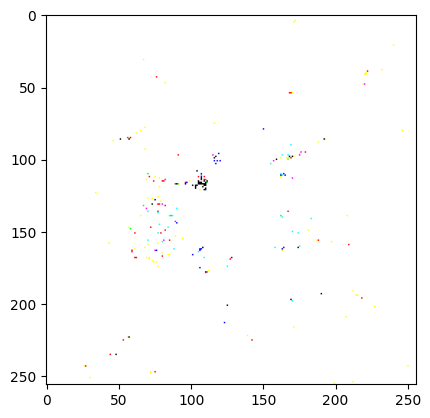

In [17]:
# type(plt.imread("Red_Knee_Tarantula/red.069.jpg"))
temp = np.empty((1,256,256,3))
temp[0]=cv2.resize(plt.imread("test_pajak.jpg"),(256,256),interpolation= cv2.INTER_NEAREST)

print(model.predict([temp]))

plt.imshow(temp[0])

os.chdir("../train")
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('Deinopis_Spider','Red_Knee_Tarantula', 'Peacock_Spider'),
    class_mode = "sparse"
)


val_los , val_acc = model.evaluate(iterator)




# loss: 0.0635 - acc: 0.9848 
